In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Get information of Sale file (df1)
df1 = pd.read_csv('shipped_order.csv')
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
#Get information of Cancel file (df2)
df2 = pd.read_csv('canceled_order.csv')
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

# Analysis Purpose: Get initial understanding of customer
Question:
1. Daily/Period volume.
2. Their success rate
3. Classify into categories of SKU criteria: %delivered/order and find which way to classify

Let's get to know more about data

In [3]:
#Success Orders
Sale_Item = df1.groupby('Item Code').sum()['Order Qty']
for code, sale in Sale_Item.items():
    if sale == Sale_Item.max():
        print('Item Code with highest Ordered: ', code, 'Order Qty: ', sale)
    elif sale == Sale_Item.min():
        print('Item Code with lowest Ordered: ', code, 'Order Qty: ', sale)

Item Code with highest Ordered:  10098739 Order Qty:  27173.0
Item Code with lowest Ordered:  10115790 Order Qty:  1.0


In [4]:
#Cancelled Order
Cancel_Item = df2.groupby('Item Code').sum()['Quantity Canceled']
for code, cancel in Cancel_Item.items():
    if cancel == Cancel_Item.max():
        print('Item Code with highest Cancellation: ', code, 'Order Qty: ', cancel)
    elif cancel == Cancel_Item.min():
        print('Item Code with lowest Cancellation: ', code, 'Order Qty: ', cancel)

Item Code with highest Cancellation:  111931 Order Qty:  6315
Item Code with lowest Cancellation:  1035986 Order Qty:  1


In [5]:
df1['Date'] = df1['Order Date'].dt.strftime('%m-%d')
df1

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date
0,528758,2019-01-03,1,1358538.0,111931,70.0,70.0,01-03
1,528791,2019-01-03,1,1254798.0,1029071,10.0,10.0,01-03
2,528791,2019-01-03,2,1254798.0,1033341,10.0,10.0,01-03
3,528791,2019-01-03,3,1254798.0,1040827,5.0,5.0,01-03
4,528791,2019-01-03,4,1254798.0,10106111,10.0,10.0,01-03
...,...,...,...,...,...,...,...,...
28310,543761,2019-02-28,1,43825307.0,113106,380.0,380.0,02-28
28311,543762,2019-02-28,1,1255123.0,113106,300.0,300.0,02-28
28312,543764,2019-02-28,2,43825307.0,10131275,400.0,400.0,02-28
28313,543765,2019-02-28,1,43825307.0,10131275,300.0,300.0,02-28


# Anwer 1st question: Daily/Period volume

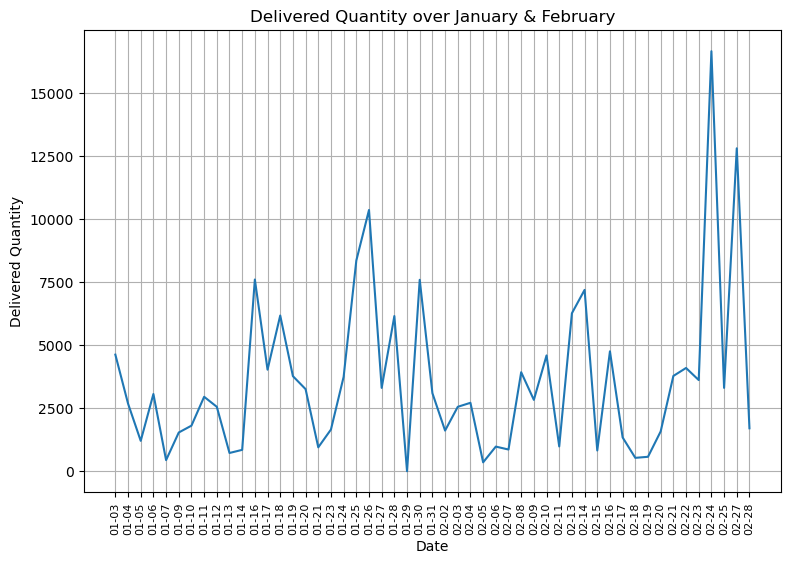

In [6]:
Sale_date = df1.groupby('Date').sum()['Order Qty']
Date = []
for a, b in Sale_date.items():
    Date.append(a)
    
fig, ax1 = plt.subplots(figsize =(9,6))

ax1.plot(Sale_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Delivered Quantity')
plt.title('Delivered Quantity over January & February')

plt.show()

In [7]:
print("Success Order by day on minimum, maximum and average: ")
print(Sale_date.min())
print(Sale_date.max())
print(Sale_date.mean())

Success Order by day on minimum, maximum and average: 
9.0
16656.0
3592.843137254902


# Conclusion on demand:
From above plot, we can see that:
1. The average ordered Qty is 3500 products daily
2. Each month, we have 3 stage: beginning with low order, order-Qty increases to medium at middle, and highest at around end of the month
We can make some addition ideas:
1. Stock should be prepared for end of month as demand has increasing trend
2. Further question: Which activity organized at the end of month that increased ordered?
We will see breakdown in categorizing later.

# Check Cancelled Order and Success Rate (%Delivered Order/Total) by day

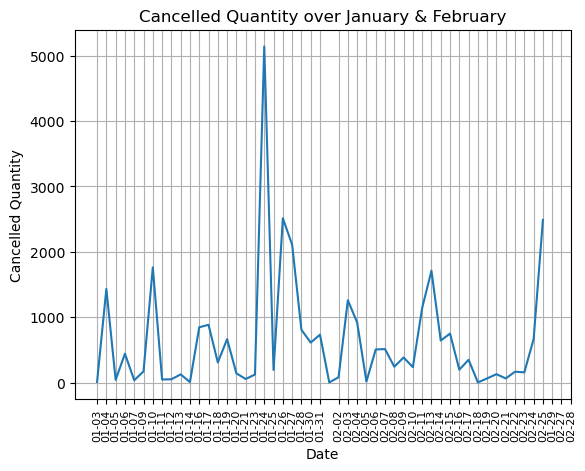

In [8]:
df2['Date'] = df2['Order Date'].dt.strftime('%m-%d')
Cancel_date = df2.groupby('Date').sum()['Quantity Ordered']
    
plt.plot(Cancel_date)
plt.xticks(Date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Cancelled Quantity')
plt.title('Cancelled Quantity over January & February')

plt.show()

In [9]:
#Let's calculate success rate/cancel rate by day
df1['Quantity Canceled']=np.nan
result = pd.concat([df1,df2.rename(columns={'Order Number':'Order No', 'Line Number':'Line No', 'Quantity Ordered':'Order Qty'})], ignore_index=True)
result = result.fillna(0)
result

,Order No,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped,Date,Quantity Canceled
0,528758,2019-01-03,1,1358538.0,111931,70.0,70.0,01-03,0.0
1,528791,2019-01-03,1,1254798.0,1029071,10.0,10.0,01-03,0.0
2,528791,2019-01-03,2,1254798.0,1033341,10.0,10.0,01-03,0.0
3,528791,2019-01-03,3,1254798.0,1040827,5.0,5.0,01-03,0.0
4,528791,2019-01-03,4,1254798.0,10106111,10.0,10.0,01-03,0.0
...,...,...,...,...,...,...,...,...,...
31972,543485,2019-02-25,8,2203715.0,10135140,3.0,0.0,02-25,3.0
31973,543488,2019-02-25,6,2203449.0,1040468,2.0,0.0,02-25,2.0
31974,543488,2019-02-25,7,2203449.0,1040466,1.0,0.0,02-25,1.0
31975,543491,2019-02-25,5,2203449.0,10135358,21.0,0.0,02-25,21.0


In [10]:
Total_Order = result.groupby('Date').sum()['Order Qty']
Total_Ship = result.groupby('Date').sum()['Quantity Shipped']
Deliver_Per = Total_Ship/Total_Order*100
print('Average Percentage of Success Shipped Rate per day: ')
Deliver_Per.mean()

Average Percentage of Success Shipped Rate per day: 


83.72271768667078

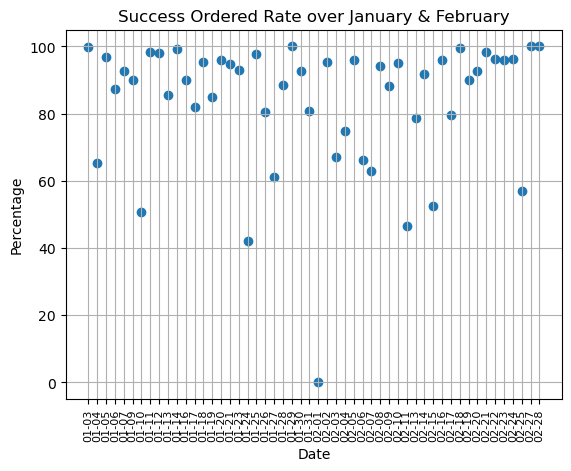

In [11]:
date = []
for a, b in Deliver_Per.items():
    date.append(a)

plt.scatter(date, Deliver_Per)
plt.xticks(date, rotation = 90, size =8)
plt.grid()

plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Success Ordered Rate over January & February')

plt.show()

# Success Rate & Order by Item

In [12]:
#Let's analyze by Item Code
Total_Order_ID = result.groupby('Item Code').sum()['Order Qty']
Total_Ship_ID = result.groupby('Item Code').sum()['Quantity Shipped']
Deliver_Per_ID = Total_Ship_ID/Total_Order_ID*100
print('Average Percentage, max and min of Success Shipped Rate by Item Code: ')
print(Deliver_Per_ID.mean())
print(Deliver_Per_ID.max())
print(Deliver_Per_ID.min())

Average Percentage, max and min of Success Shipped Rate by Item Code: 
67.4761791483127
100.0
0.0


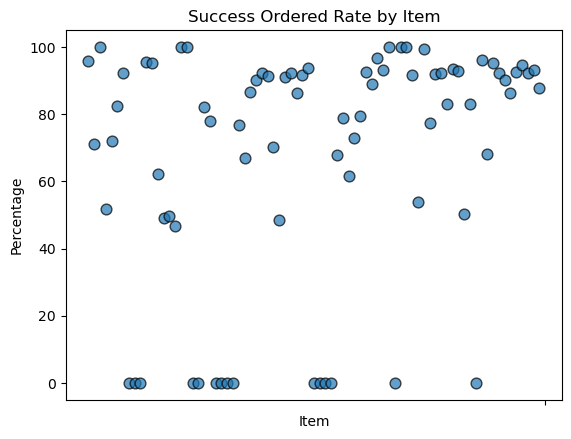

In [13]:
Item = []
for a, b in Deliver_Per_ID.items():
    Item.append(str(a))

fig, ax = plt.subplots()
ax.scatter(Item, Deliver_Per_ID, s=60, alpha=0.7, edgecolors="k")
plt.xticks('')
plt.xlabel('Item')
plt.ylabel('Percentage')
plt.title('Success Ordered Rate by Item')
plt.show()

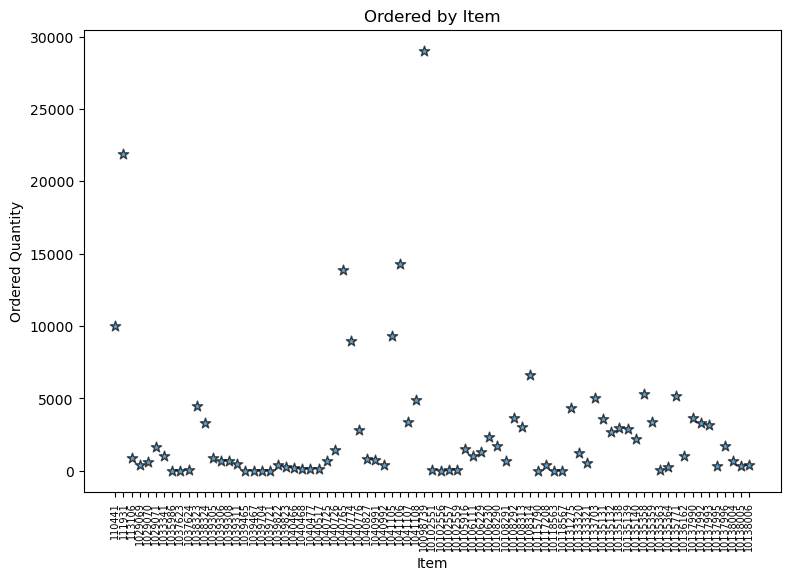

In [14]:
Item = []
for a, b in Total_Order_ID.items():
    Item.append(str(a))

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(Item, Total_Order_ID, s=60, alpha=0.7, edgecolors="k", marker = "*")
plt.xticks(Item, rotation = 90, size=7)
plt.xlabel('Item')
plt.ylabel('Ordered Quantity')
plt.title('Ordered by Item')
plt.show()

In [15]:
Total_Order_ID.mean()

2723.3924050632913

By Item: in 73 sale-items; average successful delivered by > 60%, average order for 1 item is > 2700
   We have 6 items at best_sell: over 10000 order.
   So we have some insights from Item, let's see how about Line No

# Success Rate & Order by Line No

In [16]:
#Let's Analyze by Line
Total_Order_Line = result.groupby('Line No').sum()['Order Qty']
Total_Ship_Line = result.groupby('Line No').sum()['Quantity Shipped']
Deliver_Per_Line = Total_Ship_Line/Total_Order_Line*100
print('Average Percentage, max and min of Success Shipped Rate by Line: ')
print(Deliver_Per_Line.mean())
print(Deliver_Per_Line.max())
print(Deliver_Per_Line.min())

Average Percentage, max and min of Success Shipped Rate by Line: 
88.3016705401696
100.0
42.34234234234234


C:\Users\vy\AppData\Local\Temp\ipykernel_1476\28151457.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Line, rotation = 90, size=8)


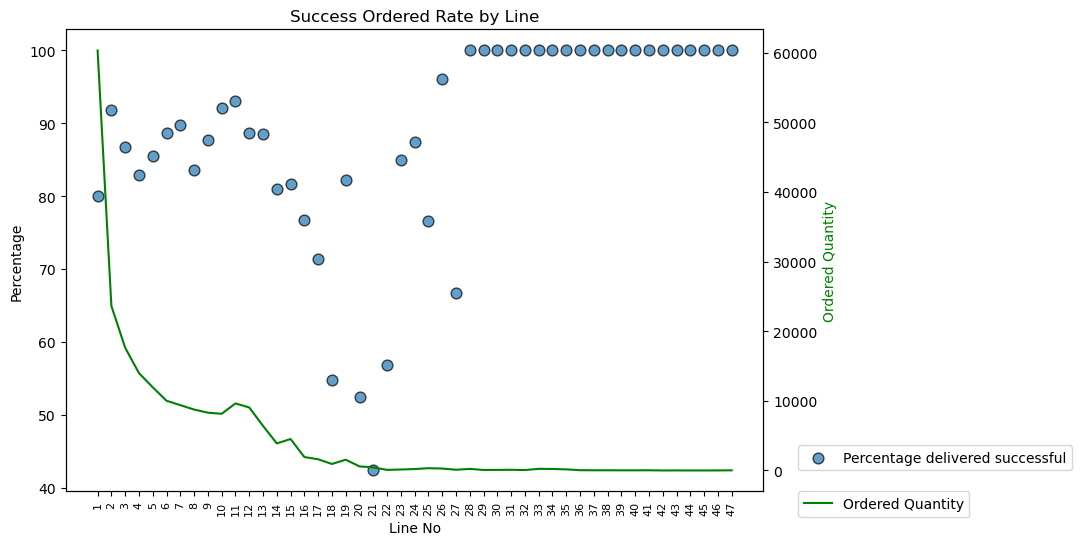

In [17]:
Line = []
for a, b in Deliver_Per_Line.items():
    Line.append(str(a))

fig, ax1 = plt.subplots(figsize =(9,6))
ax2 = ax1.twinx()

ax1.scatter(Line, Deliver_Per_Line, s=60, alpha=0.7, edgecolors="k")
ax2.plot(Line, Total_Order_Line, color = 'g')


ax1.legend(['Percentage delivered successful'], bbox_to_anchor=(1.05, 0.1), loc='upper left', borderaxespad=0)
ax2.legend(['Ordered Quantity'], bbox_to_anchor=(1.05, 0), loc='upper left', borderaxespad=0)

ax1.set_xticklabels(Line, rotation = 90, size=8)
ax1.set_xlabel('Line No')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('Ordered Quantity', color='g')

plt.title('Success Ordered Rate by Line')

plt.show()

# Conclusion on sale and success rate:
1. Average over 3700 ordered per day, with average successful delivered by > 80%
   Trend: ordered increased from early of month and reach maximum by end of month
2. By Item: in 73 sale-items; average successful delivered by > 60%, average order for 1 item is > 2500
   We have 6 items at best_sell: over 10000 order
3. By Line (ordered in 2 months). Total 47 Line:
   - 1 Best line > 60000 ordered - Line 1
   - 5 Line 10000-20000 ordered - Line 2-6
   - 15 Line 1000-10000 ordered
   - The rest < 1000 ordred
   - average successful delivered by > 88%

Let's categorize to get further understanding

In [18]:
#Categorize by Item and success rate of <80%; 80-95%; >95%
Item_Category = pd.cut(Deliver_Per_ID, bins = [0,80,95,100], labels = ['<80%','80%-95%','>95%'])
Item_Category.value_counts()

80%-95%    30
<80%       21
>95%       13
dtype: int64

In [27]:
Under_80 = []
Between80_95 = []
Over_95 = []
for a,b in Item_Category.items():
    if b == '<80%':
        Under_80.append(a)
    elif b == '80%-95%':
        Between80_95.append(a)
    else:
        Over_95.append(a)

print("List Item Code success rate over 95%: ")
print(Over_95)

List Item Code success rate over 95%: 
[110441, 113106, 1035986, 1037623, 1037624, 1038323, 1038324, 1039465, 1039467, 1039704, 1039721, 1040466, 1040468, 1040477, 1040517, 10102551, 10102556, 10102557, 10102559, 10108313, 10115790, 10117208, 10118563, 10118567, 10133321, 10135363, 10135364, 10136162]


In [20]:
#Categorize by Item and Order Quantity
Order_Qtu_Cat = pd.cut(Total_Order_ID, bins = [0,1000,3000,5000,10000,30000], labels = ['Very Low','Low','Medium','High','Very High'])
Order_Qtu_Cat.value_counts()

Very Low     41
Low          15
Medium       12
High          6
Very High     5
Name: Order Qty, dtype: int64

In [21]:
#This step helps us to identify Items with high volumn, medium or low volumn, depends on purpose of further analysis, we can dig deeper with these lists
Under_1M = []
Between1_3M = []
Between3_5M = []
Between5_10M = []
Over_10M = []
for a,b in Order_Qtu_Cat.items():
    if b == 'Very Low':
        Under_1M.append(a)
    elif b == 'Low':
        Between1_3M.append(a)
    elif b == 'Medium':
        Between3_5M.append(a)
    elif b == 'High':
        Between5_10M.append(a)
    else:
        Over_10M.append(a)
        
print('List Item has over 10M order')
print(Over_10M)
print('List Item has 5-10M order')
print(Between5_10M)

List Item has over 10M order
[110441, 111931, 1040765, 1041106, 10098739]
List Item has 5-10M order
[1040774, 1041105, 10108314, 10133703, 10135358, 10135771]


In [22]:
#Categorize by Address (Customer) and success rate of <80%; 80-95%; >95%
Customer_Order = result.groupby('Ship To Address No').sum()['Order Qty']
Customer_Ship = result.groupby('Ship To Address No').sum()['Quantity Shipped']
Deliver_Per_Customer = Customer_Ship/Customer_Order*100
Customer_Category = pd.cut(Deliver_Per_Customer, bins = [0,80,95,100], labels = ['<80%','80%-95%','>95%'])
Customer_Category.value_counts()

80%-95%    377
>95%       252
<80%        79
dtype: int64

In [23]:
#Categorize by Customer and Order Quantity
print(Customer_Order.min())
print(Customer_Order.max())
print(Customer_Order.mean())

1.0
20907.0
294.3201094391245


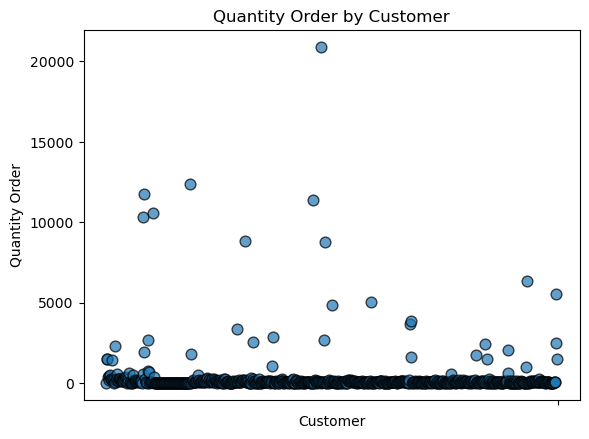

In [24]:
Customer_ID = []
for a, b in Customer_Order.items():
    Customer_ID.append(str(a))

fig, ax = plt.subplots()
ax.scatter(Customer_ID, Customer_Order, s=60, alpha=0.7, edgecolors="k")
plt.xticks('')
plt.xlabel('Customer')
plt.ylabel('Quantity Order')
plt.title('Quantity Order by Customer')
plt.show()

Above chart seems very hard to recognize distribution of group under 1000 order. So let's have another chart to see group from 0 to 1000 Order

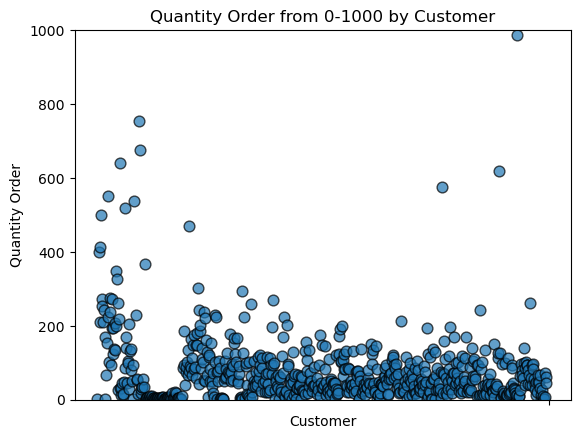

In [29]:
Customer_ID = []
for a, b in Customer_Order.items():
    Customer_ID.append(str(a))

fig, ax = plt.subplots()
ax.scatter(Customer_ID, Customer_Order, s=60, alpha=0.7, edgecolors="k")
plt.xticks('')
plt.xlabel('Customer')
plt.ylabel('Quantity Order')
plt.title('Quantity Order from 0-1000 by Customer')
ax.set_ylim(0,1000)
plt.show()

From above chart, we can see that most of customer order about 0-200 products. This chart describe better distribution of order/customer than mean value

In [25]:
Customer_Cat = pd.cut(Customer_Order, bins = [0,200,500,1000,5000,30000], labels = ['Very Low','Low','Medium','High','Very High'])
Customer_Cat.value_counts()

Very Low     652
Low           37
High          22
Very High     11
Medium         9
Name: Order Qty, dtype: int64

# Conclusion after categorizing & Direction for further investigation
From success rate, we can see:
1. Overall success rate >80%. Service level for customer about 89% have success rate >80%, means high percentage of customer receive their order
Opportunity: Discover how can we increase success rate of customer by different groups
2. By Item, we have 32% item with success rate < 80% - which is very low rate
Opportunity: Improve success rate in this group, we can analyze deeper into item code by comparing with list code categorized by Order Quantity
3. Overall, success rate by item not high, this can be big area for improvement

Further investigation:
1. Why success rate for item not high?
2. Then what we can do to improve it?
3. how can we improve success rate for customer by groups?